## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model




  
    
    


In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
# Define results
results = {}
for batchSize in BATCH_SIZE :
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()

    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              
              # different batch_size
              batch_size=batchSize, 
              
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    name_tag = 'batchSize : %.2f' % batchSize
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc' : train_acc,
                         'valid-acc' : valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

50000/50000 [==============================] - 297s 6ms/step - loss: 2.2594 - accuracy: 0.1486 - val_loss: 6.3230 - val_accuracy: 0.1681
Epoch 46/50
50000/50000 [==============================] - 297s 6ms/step - loss: 2.2579 - accuracy: 0.1540 - val_loss: 4.7947 - val_accuracy: 0.1886
Epoch 47/50
50000/50000 [==============================] - 297s 6ms/step - loss: 2.2596 - accuracy: 0.1488 - val_loss: 5.9696 - val_accuracy: 0.1903
Epoch 48/50
50000/50000 [==============================] - 296s 6ms/step - loss: 2.2588 - accuracy: 0.1514 - val_loss: 3.1533 - val_accuracy: 0.1875
Epoch 49/50
50000/50000 [==============================] - 297s 6ms/step - loss: 2.2581 - accuracy: 0.1510 - val_loss: 8.2114 - val_accuracy: 0.1703
Epoch 50/50
50000/50000 [==============================] - 297s 6ms/step - loss: 2.2627 - accuracy: 0.1523 - val_loss: 10.2539 - val_accuracy: 0.1895
Model: "model_2"
_________________________________________________________________
Layer (type)                 Outpu

50000/50000 [==============================] - 39s 774us/step - loss: 1.1530 - accuracy: 0.5901 - val_loss: 1.3510 - val_accuracy: 0.5249
Epoch 41/50
50000/50000 [==============================] - 39s 781us/step - loss: 1.1454 - accuracy: 0.5936 - val_loss: 1.3642 - val_accuracy: 0.5220
Epoch 42/50
50000/50000 [==============================] - 39s 772us/step - loss: 1.1399 - accuracy: 0.5960 - val_loss: 1.3416 - val_accuracy: 0.5321
Epoch 43/50
50000/50000 [==============================] - 39s 773us/step - loss: 1.1311 - accuracy: 0.5989 - val_loss: 1.4381 - val_accuracy: 0.4993
Epoch 44/50
50000/50000 [==============================] - 39s 773us/step - loss: 1.1299 - accuracy: 0.5983 - val_loss: 1.3605 - val_accuracy: 0.5234
Epoch 45/50
50000/50000 [==============================] - 39s 774us/step - loss: 1.1207 - accuracy: 0.6023 - val_loss: 1.3569 - val_accuracy: 0.5285
Epoch 46/50
50000/50000 [==============================] - 39s 773us/step - loss: 1.1152 - accuracy: 0.6031 - va

Epoch 35/50
50000/50000 [==============================] - 21s 418us/step - loss: 0.9153 - accuracy: 0.6769 - val_loss: 1.5126 - val_accuracy: 0.5026
Epoch 36/50
50000/50000 [==============================] - 21s 418us/step - loss: 0.9044 - accuracy: 0.6784 - val_loss: 1.4577 - val_accuracy: 0.5176
Epoch 37/50
50000/50000 [==============================] - 21s 416us/step - loss: 0.8913 - accuracy: 0.6819 - val_loss: 1.4779 - val_accuracy: 0.5163
Epoch 38/50
50000/50000 [==============================] - 21s 417us/step - loss: 0.8778 - accuracy: 0.6842 - val_loss: 1.4658 - val_accuracy: 0.5181
Epoch 39/50
50000/50000 [==============================] - 21s 417us/step - loss: 0.8721 - accuracy: 0.6871 - val_loss: 1.5017 - val_accuracy: 0.5084
Epoch 40/50
50000/50000 [==============================] - 21s 417us/step - loss: 0.8611 - accuracy: 0.6928 - val_loss: 1.5170 - val_accuracy: 0.5125
Epoch 41/50
50000/50000 [==============================] - 21s 417us/step - loss: 0.8581 - accuracy:

50000/50000 [==============================] - 8s 158us/step - loss: 0.5356 - accuracy: 0.8131 - val_loss: 2.0763 - val_accuracy: 0.4492
Epoch 31/50
50000/50000 [==============================] - 8s 159us/step - loss: 0.5134 - accuracy: 0.8211 - val_loss: 2.0525 - val_accuracy: 0.4590
Epoch 32/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.4929 - accuracy: 0.8298 - val_loss: 2.0034 - val_accuracy: 0.4683
Epoch 33/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.4760 - accuracy: 0.8356 - val_loss: 2.2115 - val_accuracy: 0.4289
Epoch 34/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.4622 - accuracy: 0.8380 - val_loss: 2.0239 - val_accuracy: 0.4749
Epoch 35/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.4400 - accuracy: 0.8493 - val_loss: 2.0483 - val_accuracy: 0.4739
Epoch 36/50
50000/50000 [==============================] - 8s 159us/step - loss: 0.4255 - accuracy: 0.8539 - val_loss:

50000/50000 [==============================] - 6s 112us/step - loss: 0.6101 - accuracy: 0.7962 - val_loss: 1.7660 - val_accuracy: 0.4688
Epoch 26/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.5880 - accuracy: 0.8036 - val_loss: 1.7515 - val_accuracy: 0.4817
Epoch 27/50
50000/50000 [==============================] - 6s 110us/step - loss: 0.5617 - accuracy: 0.8130 - val_loss: 1.9225 - val_accuracy: 0.4470
Epoch 28/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.5361 - accuracy: 0.8239 - val_loss: 1.9122 - val_accuracy: 0.4675
Epoch 29/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.5077 - accuracy: 0.8344 - val_loss: 1.8366 - val_accuracy: 0.4717
Epoch 30/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.4910 - accuracy: 0.8409 - val_loss: 1.8358 - val_accuracy: 0.4818
Epoch 31/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.4633 - accuracy: 0.8512 - val_loss:

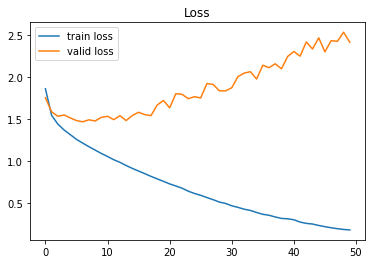

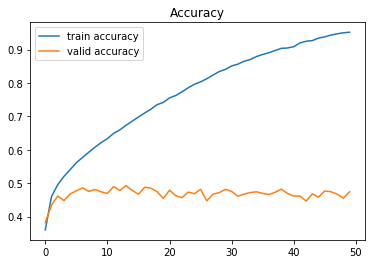

In [9]:

    # plot
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()

In [ ]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

train, test = keras.datasets.cifar10.load_data()

## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)


from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            # 2. 把 BatchNormalization 放在 activation 前
            x = BatchNormalization()(input_layer)
            
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            # 2. 把 BatchNormalization 放在 activation 前
            x = BatchNormalization()(x)
            
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 512
MOMENTUM = 0.95
results = {}
for batchSize in BATCH_SIZE :
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()

    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              
              # different batch_size
              batch_size=batchSize, 
              
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    name_tag = 'batchSize : %.2f' % batchSize
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc' : train_acc,
                         'valid-acc' : valid_acc}
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss_before = model.history.history["loss"]
valid_loss_before = model.history.history["val_loss"]
train_acc_before = model.history.history["acc"]
valid_acc_before = model.history.history["val_acc"]
   
    


In [ ]:
# Define results
results = {}
for batchSize in BATCH_SIZE :
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()

    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              
              # different batch_size
              batch_size=batchSize, 
              
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    name_tag = 'batchSize : %.2f' % batchSize
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc' : train_acc,
                         'valid-acc' : valid_acc}

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()